In [160]:
import sys
# !{sys.executable} -m pip install pyvis
# !{sys.executable} -m pip install datashader
!{sys.executable} -m pip install spotpy


  Using cached spotpy-1.5.14-py3-none-any.whl (186 kB)


In [3]:
import main
import pandas as pd
import numpy as np
import math
import scipy
from scipy.spatial import distance, distance_matrix
from scipy.spatial.distance import squareform 
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    


In [18]:
from itertools import groupby
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance, distance_matrix
from scipy import optimize



def get_pij(df_edges, df_nodes):
    
    print(sum(df_edges['n']/861000))
    # probability group= total_connections of group/connections with other group
    # probability node = (total_connections of group / total amount of persons in that group)/ 
    # (connections with other group/total amount of persons in that group)

    # E|k| = average degree between groups or network? I think between groups
    # We do no know alpha and b

    # f(b) = E|k|  - 1/N * ssummation of all probabilities with p(alpha, b)
    # because all probabilities are the same between the groups we can just say
    # f(b) = E|k| - 1/(N+M)/2 * N*M * prob(alpha, b)
    # This is between a group but for full network it will be different

    # Simulate small proportion for the whole network
    # Calculate it for each node instead of group

            #group1     group2      group3
    
    #group1  d=y        d=y         d=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


        #group1     group2      group3
    
    #group1  p=y        p=y         p=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


    # geslacht_src,lft_src,oplniv_src,etngrp_src,geslacht_dst,lft_dst,oplniv_dst,etngrp_dst
    
    df_edges['source_group'] = df_edges['geslacht_src'] + "_" +  df_edges['lft_src'] + '_' + df_edges['etngrp_src']  + '_' +df_edges['oplniv_src'].astype(str)
    df_edges['destination_group'] = df_edges['geslacht_dst'] + "_" +  df_edges['lft_dst'] + '_' + df_edges['etngrp_dst']  + '_' +df_edges['oplniv_dst'].astype(str)
    
    df_edges = df_edges.sort_values(by= ['source_group', 'destination_group'])
    new_df2 = pd.DataFrame()

    new_df = df_edges[['source_group', 'destination_group', 'n']].sort_values(by=['source_group'])

    new_df2[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']] = df_edges[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']].apply(lambda x: pd.factorize(x)[0]+1)


    source_group_df = new_df.groupby('source_group').sum().reset_index().sort_values(by=['source_group'])
    destination_group_df = new_df.groupby('destination_group').sum().reset_index().sort_values(by=['destination_group'])
    

    probabilities = []
    distances = []
    coordinates = []
    
    
    
    
    
    df_nodes['group'] = df_nodes['geslacht'] + "_" +  df_nodes['lft'] + '_' + df_nodes['etngrp']  + '_' +df_nodes['oplniv'].astype(str)
    df_nodes = df_nodes.sort_values(by=['group'])
    new_df = pd.DataFrame()
    new_df[['geslacht','lft','oplniv','etngrp']] = df_nodes[['geslacht','lft','oplniv','etngrp']].apply(lambda x: pd.factorize(x)[0])
   
    
    s = (240,240)
    
    distances = np.zeros(s)
    probabilities = np.zeros(s)
    
    probab = {}
    distance = {}
    c = 0
    for i, j in zip(new_df.iterrows(), df_nodes.iterrows()):
        
        row = i[1]
        row2 = j[1]
        
        
        distance[c] = [[row['geslacht']], [row['lft']], [row['oplniv']]]
     
        z = zeros(5)
        print(row['etngrp'])
        z[row['etngrp']] = 1
        
        distance[c].extend([z])
        
        print(distance[c])
#         print(distance[c])
        probab[c] = row2['group']
        
#         print(probab[c])

        c+=1
        
    print('hallo')
    
    character_dict = {}
    for i in range(240):
        n_s_nodes = df_nodes[df_nodes['group'] == probab[i]]['n']
        
        n_edges =  sum(df_edges[df_edges['source_group'] == probab[i]]['n'])
        
        character_dict[i] = (int(n_s_nodes),int(n_edges))
        
#         
        
    
    etn_dist = []
    age_dist = []
    opl_dist = []
    gender_dist = []
    probabilities = []
    
    for i in range(240):
        print(i)
        for j in range(240):
            


            gender_dist.append(np.linalg.norm(np.array(distance[i][0])- np.array(distance[j][0])))
#             print(gender_dist)
            age_dist.append(np.linalg.norm(np.array(distance[i][1])- np.array(distance[j][1])))
            opl_dist.append(np.linalg.norm(np.array(distance[i][2])- np.array(distance[j][2])))

            etn_dist.append(np.linalg.norm(np.array(distance[i][3])- np.array(distance[j][3])))
                
                # HIER EVEN IETS MEE DOEN
#             distances[i][j] = np.linalg.norm(np.array(distance[i])- np.array(distance[j]))

            connections = df_edges[(df_edges['source_group'] == probab[i]) & (df_edges['destination_group'] == probab[j])]['n']
            
            n_s_nodes = character_dict[i][0]
            
            tot_d_edges = character_dict[j][0]
            
            mean_connections = connections/n_s_nodes
            
            
  
            
            if len(connections) == 0:
                probabilities.append(0)
                continue
                
            probabilities.append(float(mean_connections/tot_d_edges))
#             print(float(mean_connections/tot_d_edges))
#             probabilities[i][j] = float(mean_connections/tot_d_edges) 
#             print(probabilities[i][j])
            
    
    
    return etn_dist, age_dist, opl_dist, gender_dist, probabilities

df_nodes = pd.read_csv('Data/tab_n(with oplniv).csv')

#

'''
Initialize edges for multiple layers
'''
pijs2 = []
dijs2 = []
layers = 'werkschool', 'huishouden', 'familie', 'buren'

# for i in [1, 10, 100]:
df = pd.DataFrame()
for layer in layers:
    df_edges = pd.read_csv(f'./Data/tab_{layer}.csv')

#     print(i)
    print('jall')
    etn_dist, age_dist, opl_dist, gender_dist, probabilities = get_pij(df_edges, df_nodes)
#     print(dij)
#     dijs2.append(dij)
#     pijs2.append(pij)

    df[layer+'_age_d'] = age_dist
    df[layer+'_gender_d'] = gender_dist
    df[layer+'_opl_d'] = opl_dist
    df[layer+'_etn_d'] = etn_dist
    
    
    
    
    df[layer+'_pij'] = probabilities

df.to_csv(f'pij_dij_Distances.csv')
    

jall
34.10272938443632
0
[[0], [0], [0], array([1., 0., 0., 0., 0.])]
0
[[0], [0], [1], array([1., 0., 0., 0., 0.])]
0
[[0], [0], [2], array([1., 0., 0., 0., 0.])]
1
[[0], [0], [0], array([0., 1., 0., 0., 0.])]
1
[[0], [0], [1], array([0., 1., 0., 0., 0.])]
1
[[0], [0], [2], array([0., 1., 0., 0., 0.])]
2
[[0], [0], [0], array([0., 0., 1., 0., 0.])]
2
[[0], [0], [1], array([0., 0., 1., 0., 0.])]
2
[[0], [0], [2], array([0., 0., 1., 0., 0.])]
3
[[0], [0], [0], array([0., 0., 0., 1., 0.])]
3
[[0], [0], [1], array([0., 0., 0., 1., 0.])]
3
[[0], [0], [2], array([0., 0., 0., 1., 0.])]
4
[[0], [0], [0], array([0., 0., 0., 0., 1.])]
4
[[0], [0], [1], array([0., 0., 0., 0., 1.])]
4
[[0], [0], [2], array([0., 0., 0., 0., 1.])]
0
[[0], [1], [0], array([1., 0., 0., 0., 0.])]
0
[[0], [1], [1], array([1., 0., 0., 0., 0.])]
0
[[0], [1], [2], array([1., 0., 0., 0., 0.])]
1
[[0], [1], [0], array([0., 1., 0., 0., 0.])]
1
[[0], [1], [1], array([0., 1., 0., 0., 0.])]
1
[[0], [1], [2], array([0., 1., 0., 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
jall
7.134576074332159
0
[[0], [0], [0], array([1., 0., 0., 0., 0.])]
0
[[0], [0], [1], array([1., 0., 0., 0., 0.])]
0
[[0], [0], [2], array([1., 0., 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
jall
6.951428571428578
0
[[0], [0], [0], array([1., 0., 0., 0., 0.])]
0
[[0], [0], [1], array([1., 0., 0., 0., 0.])]
0
[[0], [0], [2], array([1., 0., 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
jall
25.415563298489378
0
[[0], [0], [0], array([1., 0., 0., 0., 0.])]
0
[[0], [0], [1], array([1., 0., 0., 0., 0.])]
0
[[0], [0], [2], array([1., 0.,

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


In [128]:
df_edges['source_group']

0          Man_[0,20)_Autochtoon_1
1          Man_[0,20)_Autochtoon_1
2          Man_[0,20)_Autochtoon_1
3          Man_[0,20)_Autochtoon_1
4          Man_[0,20)_Autochtoon_1
                   ...            
25160       Vrouw_[70,80)_Overig_3
25161       Vrouw_[70,80)_Overig_3
25162       Vrouw_[70,80)_Overig_3
25163       Vrouw_[70,80)_Overig_3
25164    Vrouw_[70,80)_Surinaams_3
Name: source_group, Length: 25165, dtype: object

In [764]:
from sklearn.metrics import mean_squared_error
from scipy import stats

def prob_function(d_ij,alpha):
    
    p_ij =a/( 1 + ((1/1.2 * d_ij) ** alpha))
    
    
    return p_ij


def prob_function2(alpha, age_dist, gender_dist, opl_dist, etn_dist):
    a, b, c, d = alpha
    p_ij =a /( 1 + ((age_dist * a +  gender_dist * b +  opl_dist * c + etn_dist* d)))
    

    
    return p_ij

def prob_function3(rank, alpha, b):
    
    p_ij =1/( 1 + np.exp(alpha + b* rank))
    
    
    return p_ij

def get_df(df, name, logistic = True, seperated = True):
    
    if seperated:
        df['dij_a'] = df[name+'_age_d'] 
        df['dij_g'] = df[name+'_gender_d']
        df['dij_o'] = df[name+'_opl_d']
        df['dij_e'] = df[name+'_etn_d']
        df['pij'] = df[name+'_pij']
        df['dij'] = df[name+'_age_d'] + df[name+'_gender_d'] + df[name+'_opl_d'] + df[name+'_etn_d']
    else:
        df['pij'] = df[name+'_pij']
        df['dij'] = df[name+'_dij']
    df1 = df[df['pij'] != 0]
#     df1[df1['dij'] == 0] = max(df['pij'])
    
    df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]
#     pij = df2['pij']
#         pij = (pij - np.min(pij)) / (np.max(pij) - np.min(pij))
        # print(np.median(pij))
        # print(df2)

    
    if logistic:
        
        a = df1.groupby(by='dij').mean().reset_index()

        idx = a['pij'].idxmax()

        a = a.iloc[idx]['pij']
        
        df1['pij_logistic'] = df1['pij']

        df1['pij_logistic'][df1['pij_logistic'] > (a/2)] = 1 



        df1['pij_logistic'][df1['pij_logistic'] < (a/2) ] = 0
        
#         print(df1['pij_logistic'])
        df = df1
    return df
    


In [814]:
df = pd.read_csv('pij_dij_ethnic=1.csv')
# print(df)
df1 = get_df(df,'familie', True, False)


a = np.mean(df1[df1['dij'] == 0])['pij']


a = df1.groupby(by='dij').mean().reset_index()

idx = a['pij'].idxmax()

a = a.iloc[idx]['pij']

max(df1['pij'])

<ipython-input-764-bc27a4120500>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pij_logistic'][df1['pij_logistic'] > (a/2)] = 1
<ipython-input-764-bc27a4120500>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pij_logistic'][df1['pij_logistic'] < (a/2) ] = 0


0.0023889961389961393

In [161]:
# x_min = optimize.minimize(f2, x0=[9, 0.01], method='BFGS', tol=1e-3)
# x_min
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from scipy import stats


def f2(alpha):
    
    layer = 'buren'
    pij = df1['pij']
    
    age_dist = df1[layer+'_age_d']
    gender_dist = df1[layer+'_gender_d']
    opl_dist = df1[layer+'_opl_d']
    etn_dist = df1[layer+'_etn_d'] 
    

    
#     pij = (pij - np.min(pij)) / (np.max(pij) - np.min(pij))
    
#     print(pij)
    
#     alpha, b = alpha
    a, b, c, d = alpha
    pij_prob =  prob_function(alpha, age_dist, gender_dist, opl_dist, etn_dist)
    
    pij_prob2 = pij_prob.copy()
    pij_prob2[pij_prob >  (a/4)] = 1
    pij_prob2[pij_prob < (a/4)] = 0
    
    print(list(round(pij_prob2)))
#     print(list(pij_prob))
#     print(list(pij))
    
#     rms = mean_absolute_error(pij, pij_prob)
    
#     print(np.mean(pij),np.mean(pij_prob))
    
    rms = accuracy_score(list(pij), list((pij_prob2)))
    
#     print(rms)
    
#     print(1/rms, rms)
    
    return rms
from scipy.optimize import dual_annealing

# pij
b= 1

r_min = 1e-100
r_max = 20


bounds = [np.array([r_min, r_max]), np.array([r_min, r_max]),  np.array([r_min, r_max]),  np.array([r_min, r_max])]

# df1['pij_logistic']
# bounds = [np.array([r_min, r_max])]
# df1
# perform the simulated annealing search

# result = dual_annealing(f2, bounds, maxiter=10000)

0.0011185682326621924
[1.75681749]


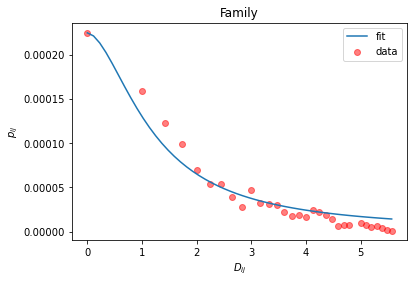

In [805]:
from scipy.optimize import curve_fit
df2 = df1.groupby(by='dij').mean().reset_index()


# df3 = df1[df1['dij'] != 0]
ydata =df1['pij']  
xdata = df1['dij']
x = np.linspace(0, max(xdata))
# plt.scatter(xdata,ydata)
# print(xdata)
 
print(max(df1['pij']))
# print(p0)
popt, pcov = curve_fit(prob_function, xdata, ydata, maxfev=5000, bounds=(0, np.inf))

print(popt)


plt.scatter(df2['dij'], df2['pij'], alpha=.5, c='r',  label="data")
plt.plot(x, prob_function(x, popt[0]), label = 'fit')
plt.title('Family')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')
plt.legend()

plt.show()

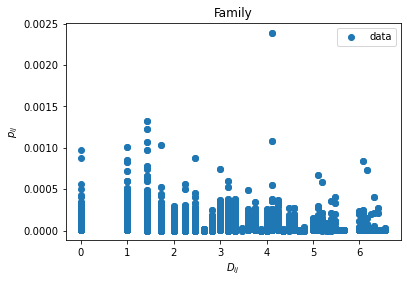

In [815]:
plt.scatter(df1['dij'], df1['pij'],  label="data")

plt.title('Family')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')
plt.legend()

1756
[[-0.3235912]]


Text(0, 0.5, '$p_{ij}$')

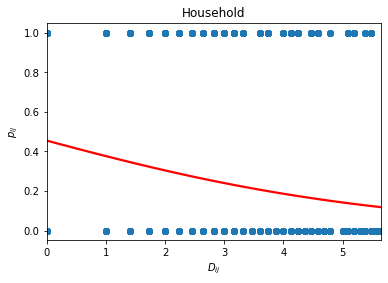

In [71]:
df2 = df1.groupby(by='dij').mean().reset_index()

ydata =df1['pij_logistic']  
xdata = df1['dij']

xdata = (np.array(xdata).reshape(len(xdata), 1))
clf = LogisticRegression(random_state=0).fit(xdata, ydata)

x = np.linspace(0, max(xdata))

# clf.predict(X[:2, :])

# clf.predict_proba(X[:2, :])


print(list(ydata).count(1))
print(clf.coef_)

plt.scatter(xdata ,ydata)


# clf.score(X, y)

# p0 = [max(ydata), np.median(xdata)] 

# p0
# popt, pcov = curve_fit(prob_function, xdata, ydata, maxfev=5000, p0=p0, bounds=(0, np.inf))



sn.regplot(x=xdata, y=ydata, logistic=True, ci=None, line_kws={'color': 'red'})
# plt.scatter(df2['dij'], df2['pij'], alpha=.5, c='r',  label="data")
# plt.plot(x, prob_function(x, popt[0], popt[1]), label = 'fit')
plt.title('Household')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')
# plt.legend()

# plt.show()

In [87]:
result

     fun: 1.9302040301442104e-05
 message: ['Maximum number of iteration reached']
    nfev: 170784
    nhev: 0
     nit: 10000
    njev: 18155
  status: 0
 success: True
       x: array([4.58058260e-05, 4.88569150e-02, 3.81459346e-01, 8.16783077e-01])

In [801]:
df = pd.read_csv('pij_dij_Distances.csv')
# print(df)
df1 = get_df(df,'huishouden', True, True)


a = np.mean(df1[df1['dij'] == 0])['pij']


a = df1.groupby(by='dij').mean().reset_index()

idx = a['pij'].idxmax()

a = a.iloc[idx]['pij']

# max(df1['pij'])

<ipython-input-764-bc27a4120500>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pij_logistic'][df1['pij_logistic'] > (a/2)] = 1
<ipython-input-764-bc27a4120500>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pij_logistic'][df1['pij_logistic'] < (a/2) ] = 0


Feature: 0, Score: -0.90543
Feature: 1, Score: -0.95335
Feature: 2, Score: -0.90903
Feature: 3, Score: -1.17136


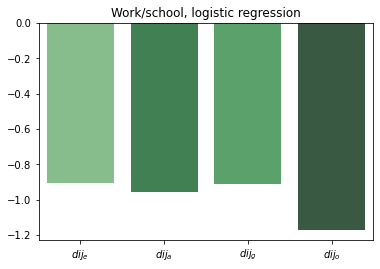

In [783]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# print(df1)
g = df1.groupby('pij_logistic')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

X = g[['dij_e', 'dij_a', 'dij_g', 'dij_o']]
pij = g['pij_logistic']

clf = LogisticRegression(penalty='none', solver="newton-cg")

clf.fit(X, pij)
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pal = sn.color_palette("Greens_d", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Work/school, logistic regression')
pyplot.xticks([0,1,2,3],['$dij_e$', '$dij_a$', '$dij_g$', '$dij_o$'] )
# sn.color_palette('Set2')
pyplot.show()

In [335]:
custom_palette = {}
importance2 = list(np.sort(abs(importance)))
for i in importance:
    print(i)
    importance2.index(abs(i))
    
    custom_palette[i]

-2.9430845072204965
-0.9905096691315196
2.9056210060319323
-0.8575624458190156


Feature: 0, Score: -0.00002
Feature: 1, Score: -0.00002
Feature: 2, Score: -0.00002
Feature: 3, Score: -0.00003


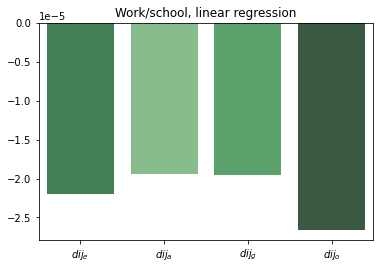

In [363]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
pij = df1['pij']
X = df1[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]

reg = LinearRegression().fit(X, pij)

# get importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pal = sn.color_palette("Greens_d", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Work/school, linear regression')
pyplot.xticks([0,1,2,3],['$dij_e$', '$dij_a$', '$dij_g$', '$dij_o$'] )
# sn.color_palette('Set2')
pyplot.show()

In [758]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# X = g[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
# pij = g['pij_logistic']

# print(df1.size)
train = df1.head(int(0.66 * df1.size))
test = df1.tail(int(0.33 * df1.size))


g = train.groupby('pij_logistic')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

X_train = train[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
y_train = train['pij_logistic']

clf = LogisticRegression(penalty='none', solver="newton-cg")
# clf = RandomForestClassifier()


X_test = test[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
y_test = test['pij_logistic']


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fn, tp, fp)
# print(y_pred)

# list(y_pred).count(1)

0.8934731839226452
[[21546   174]
 [ 2426   261]]
21546 2426 261 174


Text(0.5, 0, '$p_{ij}$')

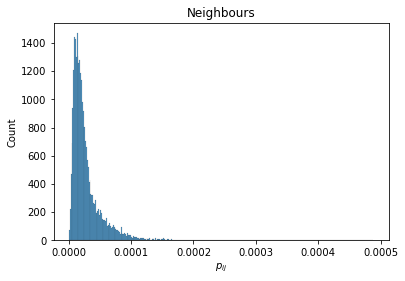

In [797]:
sn.histplot(df1['pij'])
plt.title('Neighbours')
# plt.xlabel('$D_{ij}$')
plt.xlabel('$p_{ij}$')